#**Marketing Campaign Efficacy in the Banking Industry**

# **<a id="Content" style="color:#023e8a;">Table of Contents</a>**

* [**<span style="color:#023e8a;">1. Problem Definition</span>**](#Project)
* [**<span style="color:#023e8a;">2. Executive Summary</span>**](#EDA)
* [**<span style="color:#023e8a;">3. Dataset Summary</span>**](#Questions)
* [**<span style="color:#023e8a;">4. Data Cleaning and Transformation</span>**](#Conclusion)
* [**<span style="color:#023e8a;">5. Exploratory Data Analysis</span>**](#References)
* [**<span style="color:#023e8a;">6. Conclusion</span>**](#References)
* [**<span style="color:#023e8a;">7. Road Ahead</span>**](#References)

##1.1 Problem Definition

- Our goal is to examine the most effective marketing strategies to enhance customer engagement in banks.
- To figure out if a bank’s client has opted for a fixed deposit or not. 
- Further, we aim to examine which marketing strategy is optimal to maximize the customer acquisition rate. 
- Lastly, we plan to identify the target customer demographic (customer segment most likely to subscribe) for optimal marketing.

##1.2 Interest & Motivation

As a team, we have a keen interest in the field of marketing and hence we're highly motivated to concentrate our project in the same field. Marketing Analytics is extremely crucial to adopt by all organizations, irrespective of the industry, and caters directly to the organisation’s growth & expansion. Therefore, through our analysis, we want to explore the most effective marketing strategies. These techniques will allow organizations to optimize various business processes in any field going forward, hence leading to concrete & cognizant decisions.

#2. Executive Summary

Call duration was the most important determinant of a marketing campaign’s success at a large Portuguese bank. Success was measured by if a potential customer subscribed to banking services. The optimal call duration of 10-20 minutes led to the highest success rate in the marketing campaign. Calls that were too short or too long proved ineffective. In addition to call duration; education background, job status, loan status, contact type, previous contacts, outcome of previous campaigns, and number of times contacted proved to be important factors in determining a marketing campaign success (see conclusion). Our final recommendations and insights from this analysis are as follows: when focusing on optimizing marketing campaigns, banking institutions should seek to keep call duration around 10-20 minutes and contact customers bi-weekly at most. Banking institutions should take into account previous campaign results and customer level demographics like age, education, loan status, while also monitoring contact type to target specific customer segments. This targeted effort can prove tremendously valuable when seeking to increase bank subscription rate. This can lead to lowered customer acquisition cost (CAC) and reduced expenses for future campaigns. Next steps include analyzing how these results are generalizable to banking institutions & branches across both Portugal and the global market. 




#3. Dataset Summary

**Data Source:** [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014 
<br>[Dataset URL](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The dataset holds the details of a direct marketing campaign conducted by a Portuguese banking institution.


 


##3.1 Data Overview






In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from bokeh.plotting import figure
from bokeh.io import output_notebook, output_file, show
from bokeh.models import Div
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

%matplotlib inline
plt.style.use('seaborn-white')

In [117]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
banking = pd.read_excel('/content/drive/Shareddrives/BA780 Group Project Team A08 /Dataset/banking-additional.xlsx')

Mounted at /content/drive


The data has *41188 records and 21 columns*. Each record showcases the client profile, ways the customer was targetted, previous campaign information and the success rate of the current campaign (if a particular client subscribed to the bank term deposit or not).


##3.2 Column Exploration

**Information of the Customers Tageted**

column names | description | dtype | comment |
-------------|-------------|-------|---------|
0. age | age of the customer | int | **numeric**
1. job | type of job| object |**categorical**: 'admin.', 'blue-collar', 'entrepreneur','housemaid', 'management', 'retired',<br> 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown' 
2. marital | marital status | object | **categorical**: 'divorced', 'married', 'single', 'unknown';<br> **note**: 'divorced' means divorced or widowed
3. education | education background | object | **categorical**: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', <br> 'university.degree', 'unknown'
4. default | has credit in default? | object | **categorical**: 'no', 'yes', 'unknown'
5. housing | has housing loan? | object | **categorical**: 'no', 'yes', 'unknown'
6. loan | has personal loan? | object | **categorical**: 'no', 'yes', 'unknown'
<br>

**Details on the latest Contact made with the Client**

column names | description | dtype | comment |
-------------|-------------|-------|---------|
7. contact | contact communication type | object | **categorical**: 'cellular','telephone'
8. month | last contact month of year | object | **categorical**: 'jan', 'feb', 'mar', ..., 'nov', 'dec'
9. day_of_week | last contact day of the week | object | **categorical**: 'mon','tue','wed','thu','fri'
10. duration | last contact duration (in seconds) | int | **numeric**, **Important note** this attribute highly affects the output target (e.g., if duration=0 then y='no'). <br> Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. <br> Thus, this input should only be included for benchmark purposes and should be discarded if the intention is <br>to have a realistic predictive model.

<br>

**Previous Campaign Attributes**

column names | description | dtype | comment |
-------------|-------------|-------|---------|
11. campaign | number of contacts performed during this campaign and for this client | int | **numeric**: includes last contact
12. pdays | number of days that passed by after the client was last contacted from a previous campaign | int | **numeric**; 999 means client was not previously contacted
13. previous | number of contacts performed before this campaign and for this client | int | **numeric**
14. poutcome | outcome of the previous marketing campaign | object | **categorical**: 'failure','nonexistent','success'

<br>

**Social and Economic Attributes**

column names | description | dtype | comment |
-------------|-------------|-------|---------|
15. emp.var.rate | employment variation rate | float | **numeric** quarterly indicator 
16. cons.price.idx | consumer price index | float | **numeric** monthly indicator
17. cons.conf.idx | consumer confidence index | float | **numeric** monthly indicator 
18. euribor3m | euribor 3 month rate | float | **numeric** daily indicator
19. nr.employed | number of employees | float | **numeric** quarterly indicator

<br>

**Response Variable**

column names | description | dtype | comment |
-------------|-------------|-------|---------|
20. y | whether a customer subscribed to a certain product or not | object | **categorical** yes(1), no(0)

#4. Data Cleaning and Transformation

###4.1 Data Quality Check

###4.1.1 Removing Irrelevant Columns

Through data overview and granular analysis, we saw that certain columns ('pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' and 'nr.employed') have irrelevant values and won't add relevant insights or value to the analysis. As a result, we are dropping these columns for better analysis and results.


In [118]:
banking = banking.drop(banking[['pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']], axis = 1)

###4.1.2 Analyzing Null Values

In [119]:
print(banking.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
previous       0
poutcome       0
y              0
dtype: int64


There are no null or missing values in the data, therefore our dataset is relatively clean for further exploration. However, on a closer look, we see that certain columns have 'unknown' values which might have some other significance & meaning. \
In the next step, we will look deeper into it.

###4.1.3 Analyzing 'Unknown' Values 

In [120]:
print("JOB: " ,banking['job'].unique())
print("The percentage of unknown values in job attribute is",round(((banking['job'].value_counts()['unknown']/banking['job'].count())*100),3),"% \n")

print("MARITAL: " ,banking['marital'].unique()) 
print("The percentage of unknown values in marital attribute is",round(((banking['marital'].value_counts()['unknown']/banking['marital'].count())*100),3),"% \n")

print("EDUCATION: " ,banking['education'].unique()) 
print("The percentage of unknown values in education attribute is",round(((banking['education'].value_counts()['unknown']/banking['education'].count())*100),3),"% \n")

print("DEFAULT: " ,banking['default'].unique()) 
print("The percentage of unknown values in default attribute is",round(((banking['default'].value_counts()['unknown']/banking['default'].count())*100),3),"% \n")

print("HOUSING: " ,banking['housing'].unique()) 
print("The percentage of unknown values in housing attribute is",round(((banking['housing'].value_counts()['unknown']/banking['housing'].count())*100),3),"% \n")

print("LOAN: " ,banking['loan'].unique()) 
print("The percentage of unknown values in loan attribute is",round(((banking['loan'].value_counts()['unknown']/banking['loan'].count())*100),3),"% \n")


JOB:  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
The percentage of unknown values in job attribute is 0.801 % 

MARITAL:  ['married' 'single' 'divorced' 'unknown']
The percentage of unknown values in marital attribute is 0.194 % 

EDUCATION:  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
The percentage of unknown values in education attribute is 4.203 % 

DEFAULT:  ['no' 'unknown' 'yes']
The percentage of unknown values in default attribute is 20.873 % 

HOUSING:  ['no' 'yes' 'unknown']
The percentage of unknown values in housing attribute is 2.404 % 

LOAN:  ['no' 'yes' 'unknown']
The percentage of unknown values in loan attribute is 2.404 % 



We can clearly see that these columns ('job', 'marital','education', 'default', 'housing', and 'loan'), have 'unknown' values. 

However, we do not intend to convert these 'unknown' values to null, drop them or replace them with another metric (mean, mode or median). The reasons being:
- The 'unknown' values do not add to become a significant number in any variable.
- Dropping 'unknown' values would mean removing the entire records, which would hamper the results of the analysis and lower the number of rows.

##4.2 Preprocessing

Having a closer lens on the data, certain columns need to be amended or modified to make the records concise and easier to analyze. For instance, we will categorize the 'age' variable into different age groups ('18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85' and '86-100') for better interpretation. 

####4.2.1 Amending Columns

####4.2.1.1 Age

As mentioned above, for the sake of easier analysis and visualisation, we are categorizing the 'age' variable into different groups ('18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85' and '86-100') to drill-down on  important features of different age groups. 

As such, we have changed the data type of 'age' from int to string.

In [121]:
for num in banking['age'].index:
  if banking['age'][num]>=17 and banking['age'][num]<=25:
    banking['age'][num] = '16 - 25'
  elif banking['age'][num]>=26 and banking['age'][num]<=35:
    banking['age'][num] = '26 - 35'
  elif banking['age'][num]>=36 and banking['age'][num]<=45:
    banking['age'][num] = '36 - 45'
  elif banking['age'][num]>=46 and banking['age'][num]<=55:
    banking['age'][num] = '46 - 55'
  elif banking['age'][num]>=56 and banking['age'][num]<=65:
    banking['age'][num] = '56 - 65'
  elif banking['age'][num]>=66 and banking['age'][num]<=75:
    banking['age'][num] = '66 - 75'
  elif banking['age'][num]>=76 and banking['age'][num]<=85:
    banking['age'][num] = '76 - 85'
  else: 
    banking['age'][num] = '86 - 100'

# Converting the data type of age to string
banking['age'] = banking['age'].astype('str')
print(banking['age'].unique())

<ipython-input-121-d5d9c5205061>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banking['age'][num] = '56 - 65'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


['56 - 65' '36 - 45' '16 - 25' '26 - 35' '46 - 55' '66 - 75' '76 - 85'
 '86 - 100']


####4.2.1.2 Education

The 'education' attribute includes the different education levels of clients targetted in the marketing campaign. To make the records more intuitive and reduce the number of education categories, we have converted the 3 categories ('basic.4y', 'basic.6y' and 'basic.9y') into 'Pre-High School' category.


In [122]:
mapping = {'basic.4y': 'pre.high.school', 'basic.6y': 'pre.high.school', 'basic.9y': 'pre.high.school'}
banking['education'] = banking['education'].replace(mapping)
banking['education'].unique()

array(['pre.high.school', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

####4.2.1.3 Duration

The 'duration' variable is the duration of the last call made with a client. We have converted the 'duration' variable from seconds to minutes and categorized into different minute buckets to understand how 'duration' factor affects the subscription rate.  


In [123]:
for num in banking['duration'].index:
  if banking['duration'][num]>=0 and banking['duration'][num]<=599:
    banking['duration'][num] = '0 - 10'

  elif banking['duration'][num]>=600 and banking['duration'][num]<=1199:
    banking['duration'][num] = '10 - 20'

  elif banking['duration'][num]>=1200 and banking['duration'][num]<=1799:
    banking['duration'][num] = '20 - 30'

  elif banking['duration'][num]>=1800:
    banking['duration'][num] = '30+'

# Converting the data type of age to string
banking['duration'] = banking['duration'].astype('str')
banking['duration'].unique()

<ipython-input-123-3d955d923e95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banking['duration'][num] = '0 - 10'


array(['0 - 10', '20 - 30', '10 - 20', '30+'], dtype=object)

####4.2.1.4 Campaign

The 'campaign' variable represents the number of times a particular client was contacted. 

We are converting the number of times a particular client was contacted into categories ('0-5', '5-10', 10-15', '15-20', '20-25', '25-30' and '30+') to understand how the count of contacting customers impacts the subscription rate in exploratory analysis.    


In [124]:
for num in banking['campaign'].index:
  if banking['campaign'][num]>=0 and banking['campaign'][num]<5:
    banking['campaign'][num] = '0 - 5'
  elif banking['campaign'][num]>=5 and banking['campaign'][num]<10:
    banking['campaign'][num] = '5 - 10'
  elif banking['campaign'][num]>=10 and banking['campaign'][num]<15:
    banking['campaign'][num] = '10 - 15'
  elif banking['campaign'][num]>=15 and banking['campaign'][num]<20:
    banking['campaign'][num] = '15 - 20'
  elif banking['campaign'][num]>=20 and banking['campaign'][num]<25:
    banking['campaign'][num] = '20 - 25'
  elif banking['campaign'][num]>=25 and banking['campaign'][num]<=30:
    banking['campaign'][num] = '25 - 30'
  else: 
    banking['campaign'][num] = '30+'

# Converting the data type of age to string
banking['campaign'] = banking['campaign'].astype('str')
banking['campaign'].unique()

<ipython-input-124-cbdafedfb535>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banking['campaign'][num] = '0 - 5'


array(['0 - 5', '5 - 10', '10 - 15', '15 - 20', '20 - 25', '25 - 30',
       '30+'], dtype=object)

####4.2.1.5 Default

The 'default' variable means whether the client contacted has credt in default or not. We are changing the 'default' variable's name to 'Credit_in_Default' to make the column easily understandable. 



In [125]:
banking = banking.rename({'default': 'credit_in_default'}, axis=1)

####4.2.1.6 Y (Response Variable)

The response variable 'y' means whether the client contacted has subscribed to the bank services or not. We are changing the response variable's name from 'y' to 'Subscribed (Yes/No)' to make the data easily interpretable. 


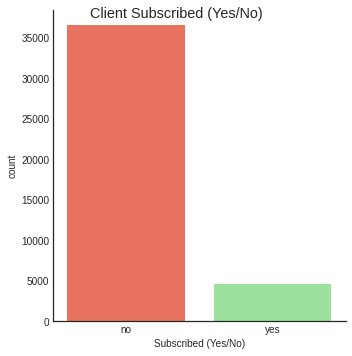

In [126]:
banking = banking.rename({'y': 'Subscribed (Yes/No)'}, axis=1)
subscription_rate = sns.catplot(x='Subscribed (Yes/No)', kind= 'count', data=banking,
                                palette=sns.color_palette(['Tomato', 'LightGreen']))
subscription_rate.fig.suptitle("Client Subscribed (Yes/No)" ,
               fontsize = 'x-large');

We can clearly see that people who said 'yes' (or subscribed to bank services) are *approximately 10%* of the total respondents, indicating data imbalance. We will keep this mind when performing exploratory and granular analysis. 


We have cleaned and transformed the data and the resulting dataset is shown below.



In [127]:
banking.head()

,age,job,marital,education,credit_in_default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,Subscribed (Yes/No)
0,56 - 65,housemaid,married,pre.high.school,no,no,no,telephone,may,mon,0 - 10,0 - 5,0,nonexistent,no
1,56 - 65,services,married,high.school,unknown,no,no,telephone,may,mon,0 - 10,0 - 5,0,nonexistent,no
2,36 - 45,services,married,high.school,no,yes,no,telephone,may,mon,0 - 10,0 - 5,0,nonexistent,no
3,36 - 45,admin.,married,pre.high.school,no,no,no,telephone,may,mon,0 - 10,0 - 5,0,nonexistent,no
4,56 - 65,services,married,high.school,no,no,yes,telephone,may,mon,0 - 10,0 - 5,0,nonexistent,no


## 4.3 Feature Importance

To get some preliminary feature importances we will use the Random Forest classifier, a wellknown decision-tree based model.  We've used one-hot encoding to encode the categorical features and dropped the target variable 'y'. I've also manually tested a few hyperparameters to get a better model.

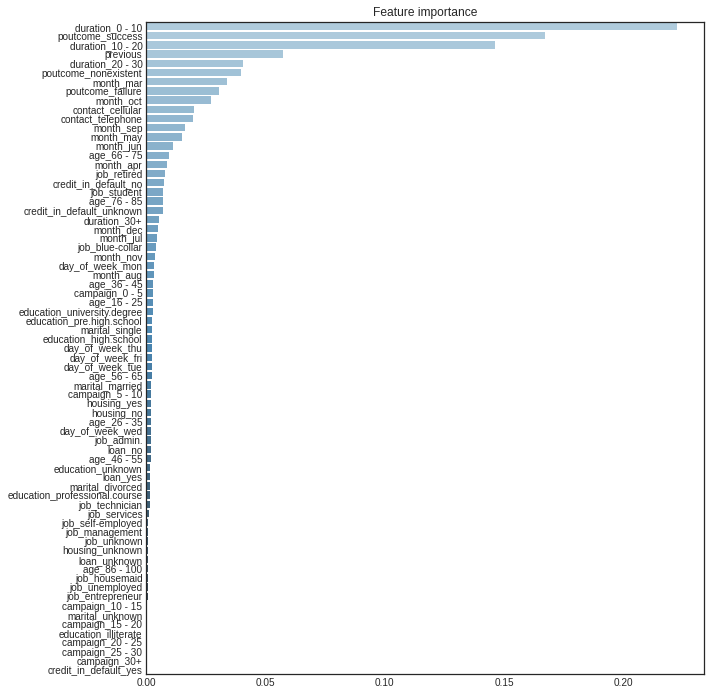

In [128]:
from sklearn.ensemble import RandomForestClassifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
banking_dummies = pd.get_dummies(banking)
# Drop redundant columns (for features with two unique values)
x, y = banking_dummies.drop(['Subscribed (Yes/No)_yes', 'Subscribed (Yes/No)_no'], axis=1), banking['Subscribed (Yes/No)']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

According to the Feature Importance plot, the best predictors for subscription appear to be *duration, previous,* and *poutcome*. In the following analysis, we will analyze the relationship between these top key predictors with the target variable. 

Now we will move onto the next phase of our analysis: Exploratory Data Analysis.



# 5. Exploratory Data Analysis

##Topic 1: Details of the Customers Targeted

###**[Question 1.1] Among all the age group, which are the top 3 age groups that have had the highest subscription rate?**




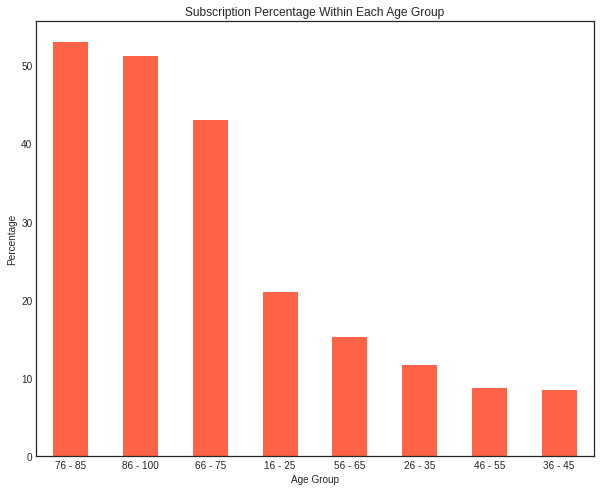

In [129]:
age_suscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['age'].value_counts().sort_index(ascending=False)
age_not_suscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['age'].value_counts().sort_index(ascending=False)

age_subscribed_prop = round((age_suscribed/(age_not_suscribed+age_suscribed)*100),2).sort_values(ascending = False)
age_subscribed_prop


age_subscribed_prop.plot(kind='bar',figsize=(10,8),color="tomato")
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.title('Subscription Percentage Within Each Age Group')
plt.xticks(rotation = 0)

plt.show();

Out of all the age groups, **'76-85', '86-100'** and **'66-75'** have the highest subscription rate. 

To tackle the challenge of unbalanced data, we have taken the percentage of subscription rate for each age category to <i> normalize </i>across all age groups. 

###**[Question 1.2] Analyze the Relationship Between Marriage Status and the Age groups which had the highest subscription rate ('76-85', '86-100'** and **'66-75')**

In [130]:
top_age_marital_status = banking[(banking['Subscribed (Yes/No)'] == 'yes') & ((banking['age'] == '76 - 85') | 
(banking['age'] == '86 - 100') | (banking['age'] == '66 - 75'))].groupby('education')['age'].count().sort_values(ascending = False)

print(top_age_marital_status)        
print("The top 3 age categories who subscribed the most (as seen above), {}% of those people are married.".
format(round((top_age_marital_status[0]/top_age_marital_status.sum())*100, 2)))

education
pre.high.school        164
unknown                 36
professional.course     32
university.degree       31
high.school             26
illiterate               1
Name: age, dtype: int64
The top 3 age categories who subscribed the most (as seen above), 56.55% of those people are married.


Out of the top 3 age groups that had the highest subscription rate ('76-85', '86-100' and '66-75'), approximately 60% of those people are married. 

###**[Question 1.3] On the basis of job profiles, which marketing strategy performed best (or had the highest subscription rate) for which client segment?** 

In [131]:
job_suscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['job'].value_counts().sort_index(ascending=True)
job_not_suscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['job'].value_counts().sort_index(ascending=True)

job_subscribed_percentage = round((job_suscribed/(job_not_suscribed+job_suscribed))*100,2).sort_values(ascending = False)
print(job_subscribed_percentage)

student          31.43
retired          25.23
unemployed       14.20
admin.           12.97
management       11.22
unknown          11.21
technician       10.83
self-employed    10.49
housemaid        10.00
entrepreneur      8.52
services          8.14
blue-collar       6.89
Name: job, dtype: float64


**Students** have had the highest subscription rate to bank term deposit.  This shows that marketing campaign appears to be most successful on students across all the job profiles. 

###**[Question 1.4] What is the campaign success rate among customers from different education backgrounds?**

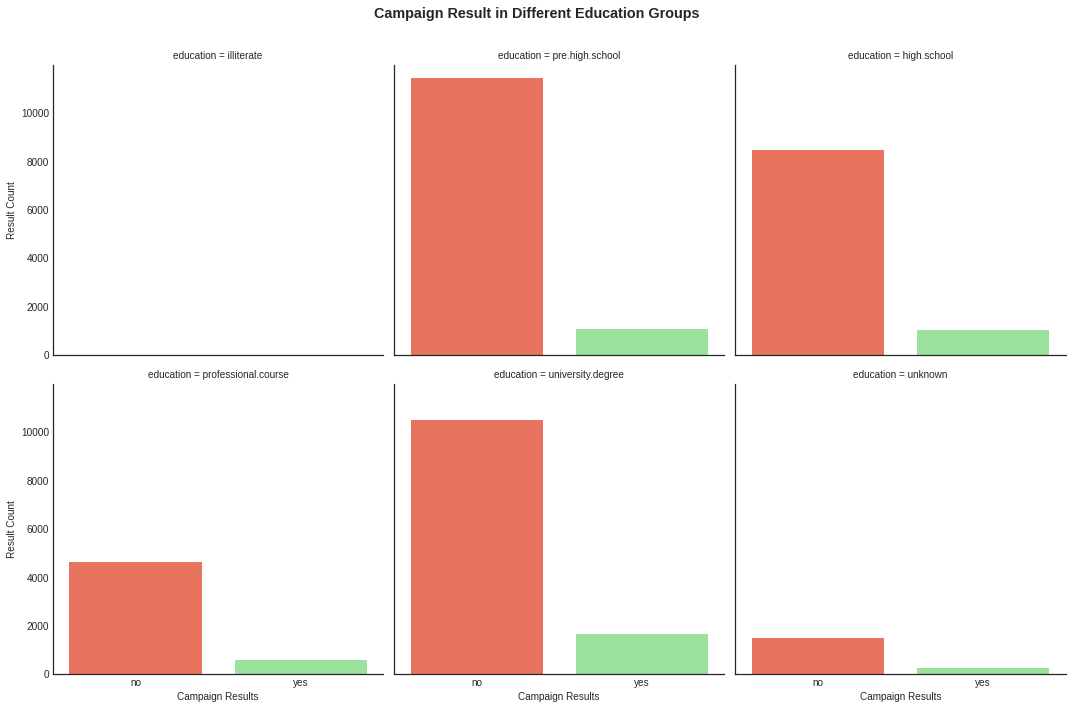

In [132]:
education_order = ['illiterate',
                  'pre.high.school',
                  'high.school',
                  'professional.course',
                   'university.degree',
                   'unknown']

edu_result = sns.catplot(x = 'Subscribed (Yes/No)',
            data = banking,
            kind = 'count',
            col = 'education',
            col_wrap = 3,
            col_order = education_order,
            palette=sns.color_palette(['Tomato', 'LightGreen']))

edu_result.fig.suptitle("Campaign Result in Different Education Groups" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )

edu_result.fig.subplots_adjust( top = 0.9 )

edu_result.set_axis_labels( "Campaign Results" , "Result Count" )

plt.show()

The above subplots showcase the subscription outcome ("Yes" or "No") within each education group.

To overcome *the issue of unbalanced data* across all education groups, we are going to visualize the subscription rate of each group.

In [133]:
banking_yes = banking[banking['Subscribed (Yes/No)'] == 'yes']
a = banking_yes.education.value_counts()
b = banking.education.value_counts()
c = a/b*100
c = c.to_frame(name = 'success percentage(%)')
c.reset_index(inplace = True)
c = c.rename(columns = {'index':'education'})
c["success percentage(%)"] = round(c["success percentage(%)"],2)
c

,education,success percentage(%)
0,high.school,10.84
1,illiterate,22.22
2,pre.high.school,8.70
3,professional.course,11.35
4,university.degree,13.72
5,unknown,14.50


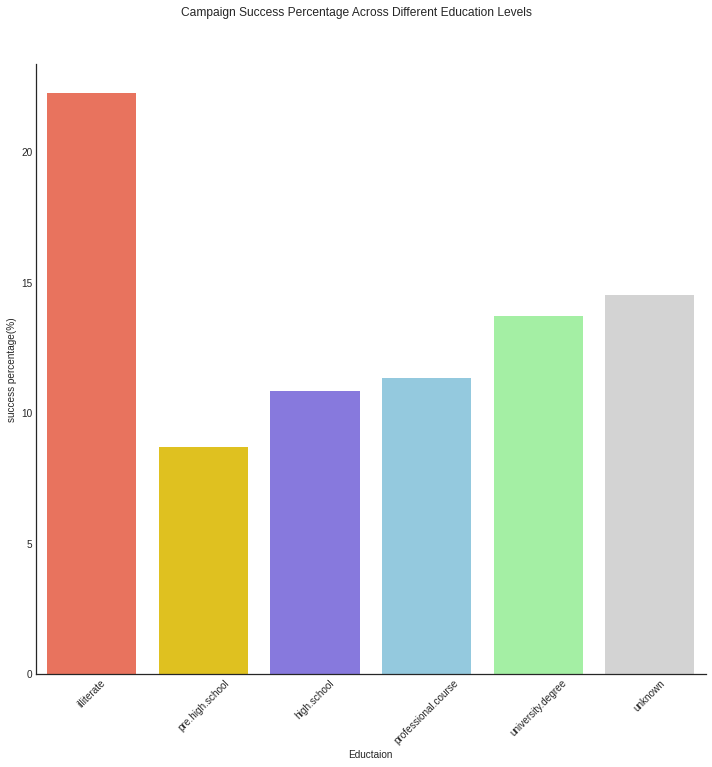

In [134]:
edu_pct = sns.catplot(x = 'education',
            y = 'success percentage(%)',
            data = c,
            kind = 'bar',
            order = education_order, height=10,aspect=1,
            palette = sns.color_palette(['Tomato', 'Gold', 'MediumSlateBlue', 'SkyBlue', 'PaleGreen', 'LightGray']))

edu_pct.fig.subplots_adjust(top=0.9) 
edu_pct.fig.suptitle('Campaign Success Percentage Across Different Education Levels') 

plt.xlabel('Eductaion')
plt.ylabel('success percentage(%)')

plt.xticks(rotation=45)

plt.show()

Unexpectedly, we can see that the **illiterate** category had the highest and almost double the success rate than that of all the other educated groups. The reason may be that this particular data is unbalanced; we only have 18 records for the illiterate category, significantly lower than those of other education groups.

For other groups, **the campaign success percentage tends to increase as the educational level goes up**.



##Topic 2: Subscription Rate based on Contact Type and Month

###**[Question 2.1] What month witnessed the highest number of subscriptions?**

In [135]:
df = banking.groupby(['month','Subscribed (Yes/No)']).agg({'Subscribed (Yes/No)': 'count'})
df2 = df.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df2.head(14)

Subscribed (Yes/No)
month Subscribed (Yes/No)                     
apr   no                             79.521277
      yes                            20.478723
aug   no                             89.397863
      yes                            10.602137
dec   no                             51.098901
      yes                            48.901099
jul   no                             90.953443
      yes                             9.046557
jun   no                             89.488530
      yes                            10.511470
mar   no                             49.450549
      yes                            50.549451
may   no                             93.565255
      yes                             6.434745

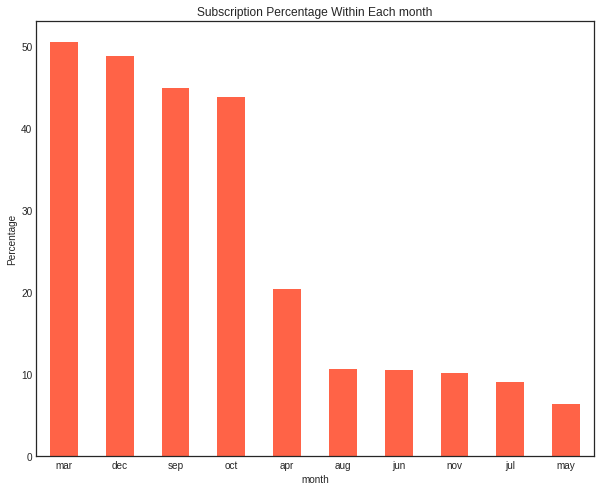

In [136]:
month_subscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['month'].value_counts().sort_index(ascending=False)
month_not_subscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['month'].value_counts().sort_index(ascending=False)

month_subscribed_prop = round((month_subscribed/(month_subscribed+month_not_subscribed)*100),2).sort_values(ascending = False)
month_subscribed_prop


month_subscribed_prop.plot(kind='bar',figsize=(10,8),color="tomato")
plt.xlabel("month")
plt.ylabel("Percentage")
plt.title('Subscription Percentage Within Each month')
plt.xticks(rotation = 0)

plt.show();

**March** witnessed the highest percentage of subscriptions and 50.5% of those who contacted subscribed to bank services. However,  **May** had the least percentage of people who subscribed - only 6.43%.

###**[Question 2.2] What mode of contact was most effective in terms of subscription?**

In [137]:
df3 = banking.groupby(['contact','Subscribed (Yes/No)']).agg({'Subscribed (Yes/No)': 'count'})
df4 = df3.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df4

Subscribed (Yes/No)
contact   Subscribed (Yes/No)                     
cellular  no                             85.262393
          yes                            14.737607
telephone no                             94.768679
          yes                             5.231321

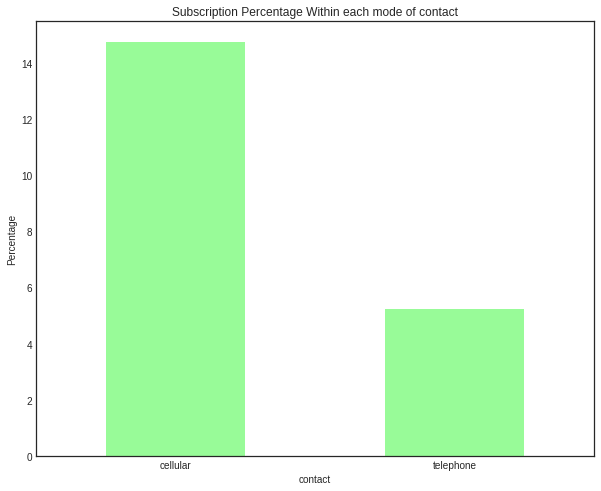

In [138]:
contact_subscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['contact'].value_counts().sort_index(ascending=False)
contact_not_subscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['contact'].value_counts().sort_index(ascending=False)

contact_subscribed_prop = round((contact_subscribed/(contact_subscribed+contact_not_subscribed)*100),2).sort_values(ascending = False)
contact_subscribed_prop


contact_subscribed_prop.plot(kind='bar',figsize=(10,8),color="palegreen")
plt.xlabel("contact")
plt.ylabel("Percentage")
plt.title('Subscription Percentage Within each mode of contact')
plt.xticks(rotation = 0)

plt.show();

Out of all the people contacted via cellular, 14.73% of people subscribed to bank services; whereas only 5.23% subscribed out of all the people contacted via telephone. 

***As such, cellular was more effective than telephone***

###**[Question 2.3] Did housing loan or personal loan have an impact on subscriptions?** 

**a) Housing Loan**

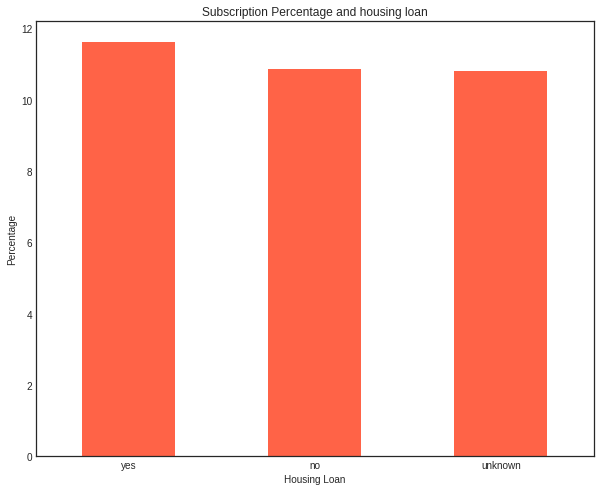

In [139]:
housing_subscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['housing'].value_counts().sort_index(ascending=False)
housing_not_subscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['housing'].value_counts().sort_index(ascending=False)

housing_subscribed_prop = round((housing_subscribed/(housing_subscribed+housing_not_subscribed)*100),2).sort_values(ascending = False)
housing_subscribed_prop


housing_subscribed_prop.plot(kind='bar',figsize=(10,8),color="tomato")
plt.xlabel("Housing Loan")
plt.ylabel("Percentage")
plt.title('Subscription Percentage and housing loan')
plt.xticks(rotation = 0)

plt.show();

**b) Personal Loan**

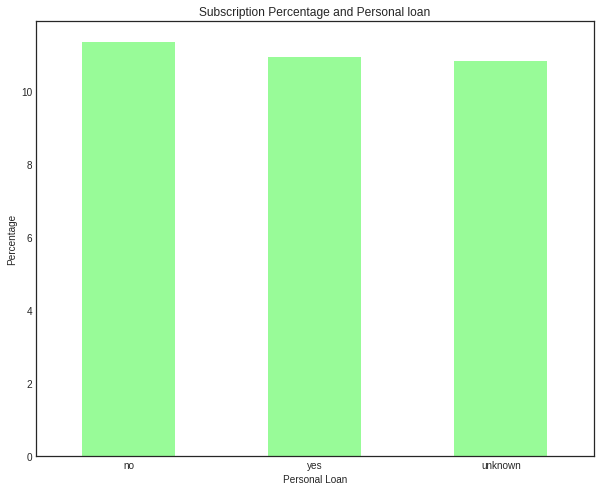

In [140]:
housing_subscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['loan'].value_counts().sort_index(ascending=False)
housing_not_subscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['loan'].value_counts().sort_index(ascending=False)

housing_subscribed_prop = round((housing_subscribed/(housing_subscribed+housing_not_subscribed)*100),2).sort_values(ascending = False)
housing_subscribed_prop


housing_subscribed_prop.plot(kind='bar',figsize=(10,8),color="PaleGreen")
plt.xlabel("Personal Loan")
plt.ylabel("Percentage")
plt.title('Subscription Percentage and Personal loan')
plt.xticks(rotation = 0)

plt.show();

As shown in table 1, approximately 10% of people subscribed to bank services irrespective of whether they had a housing loan. Similarly, as shown in table 2, approximately 10% people subscriped irrespective of whether they had a personal loan or not. 

<i>**As a result, having a housing loan or personal loan doesn't have a significant impact on the client's decision to take a subscription with the bank.**</i>


###**[Question 2.4] Analyzing the Relationship Between Education and Loan Status among those subscribed to bank services**

From **1.4** and **2.3** of the EDA section we concluded the following:

1. The campaign success rate increases as educational level goes up (excluding the `illiterate` group due to unbalanced data);
2. Having a personal loan does not have significant impact on the campaign outcome, as the percentages of people who subsdribed to the bank service are almost identifical acorss all three groups (`yes`, `no`, and `unknown`).

However, are there any interaction effects on the campaign result when we pair these two customer features together? This sub-section aims to address this question on a descriptive analytical level.


In [141]:
banking_yes = banking[banking['Subscribed (Yes/No)'] == 'yes']
banking_yes.loc[banking_yes['education'] == 'high.school']
banking_yes.groupby(['education','loan']).agg({'Subscribed (Yes/No)': 'count'})

# plotting count plots on education & loan using Bokeh
output_notebook()
output_file("education_loan.html")

education_level = ['High School', 'Pre High School', 'Professional Course', 'University Degree']
loan_status = ['Yes', 'No', 'Unknown']

data = {'education' : education_level,
        'Yes'   : [150, 162, 85, 243],
        'No'   : [860, 896, 494, 1393],
        'Unknown'   : [21, 31, 16, 34]}

x = [ (education, loan) for education in education_level for loan in loan_status ]
counts = sum(zip(data['Yes'], data['No'], data['Unknown']), ())

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), width = 1000, height=400, title="Loan Status Counts by Education", y_axis_label = 'Count',
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=1, source=source, line_color="white", 
       fill_color=factor_cmap('x', palette=Spectral6, factors=loan_status, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [142]:
# Percentage of each loan groups for every education level
banking_edu_loan = banking_yes.groupby(['education','loan']).agg({'Subscribed (Yes/No)': 'count'})
banking_loan_perct = banking_edu_loan.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
banking_loan_perct

# which eductaion and loan pair has the highest subscription rate?
output_file("education_loan_pct.html")

education_level = ['High School', 'Pre High School', 'Professional Course', 'University Degree']
loan_status = ['Yes', 'No', 'Unknown']

data = {'education' : education_level,
        'Yes': [14.5, 14.8, 14.3, 14.6],
        'No': [83.4, 82.2, 83, 83.4],
        'Unknown': [2, 2.8, 2.7, 2]}

x = [ (education, loan) for education in education_level for loan in loan_status ]
counts = sum(zip(data['Yes'], data['No'], data['Unknown']), ())

source = ColumnDataSource(data=dict(x=x, counts=counts))

p_1 = figure(x_range=FactorRange(*x), width = 1000, height=400, title="Success Rate for Each Loan Group of Every Education Level",
           y_axis_label = 'Percentage', toolbar_location=None, tools="")

p_1.vbar(x='x', top='counts', width=1, source=source, line_color="white", 
       fill_color=factor_cmap('x', palette=Spectral6, factors=loan_status, start=1, end=2))

p_1.y_range.start = 0
p_1.x_range.range_padding = 0.1
p_1.xaxis.major_label_orientation = 1
p_1.xgrid.grid_line_color = None

show(p_1)

Based on the above analysis and visualizations we can conclude the following:

1. Across all education levels, customers who do not have any personal loan are significantly more likely to subscribe to bank service than those who do;

2. The campaign has the highest success rate among customers with a **high school education background and with no personal loan**: approximately 84.3% of such customers subscribed to the bank services. In addition, the success rate among customers with a **university degree and have no personal loan** comes in a close second with a 0.0001 margin in percentage.

3. Customers who come from a professional course background and with a personal loan are least likely to subscribe to the bank service, with the lowest success rate of 14.2%.

Thus, we would advice our marketing campaign to focus on customers **without a personal loan, and are either high school or college graduates**. 

###**[Question 2.5] Analyzing the Relationship Between job profile and Loan Status among those subscribed to bank services**

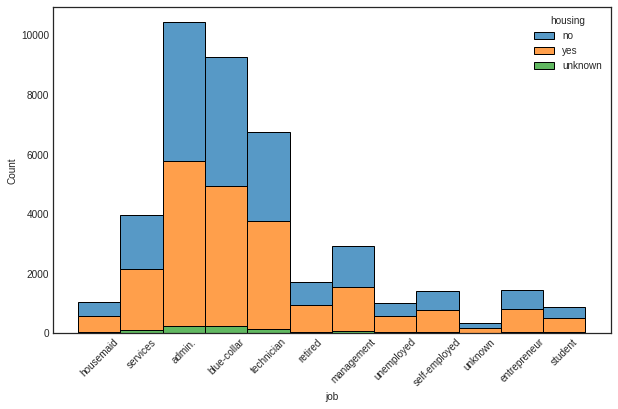

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
sns.histplot(binwidth=10, x="job", hue="housing", data=banking, stat="count", multiple="stack")
plt.xticks(rotation='45');

The ratio between those having a housing loan and those who don't does not change significantly between people having different job types. Therefor, it can be concluded and reiterated from an above section that housing loan does not have a significant impact on whether or not someone subscribes for banking services. This graph highlights that job status is the more important indicator of 

##Topic 3: Impact of Campaign on the Clients

###**[Question 3.1] How does the previous campaign outcome influence the marketing strategy?**

We aim to drill-down on the interaction between previous campaign outcome and the subscription rate. 

In [144]:
yxpoutcome = pd.crosstab(index=banking['poutcome'],
            columns=banking['Subscribed (Yes/No)'])
yxpoutcome.style.set_caption("Table 1")

Subscribed (Yes/No),no,yes
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


In [145]:
yxpoutcome_prop = pd.crosstab(index=banking['poutcome'],
            columns=banking['Subscribed (Yes/No)'],
            normalize = 'index')
yxpoutcome_prop.style.set_caption("Table 2")

Subscribed (Yes/No),no,yes
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911678,0.088322
success,0.348871,0.651129


To normalize, we have converted the count of subscription result for each campaign outcome in Table 1 into percentage expression in Table 2.
In the next step, we are going to visualize the success subscription rate for each outcome ("failure", "nonexistent", "success") obtained from the previous campaign.

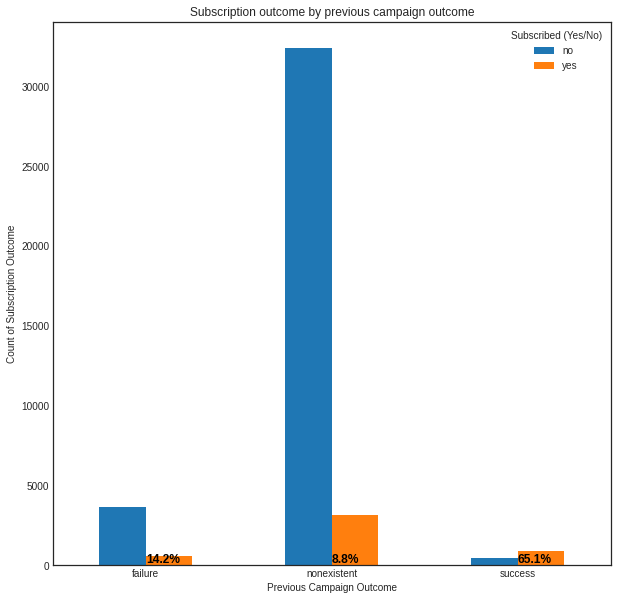

In [146]:
pd.crosstab(banking.poutcome,banking['Subscribed (Yes/No)']).plot(kind='bar', figsize = (10,10))
plt.title('Subscription outcome by previous campaign outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count of Subscription Outcome')
plt.xticks(rotation = 0)

for n, x in enumerate([*yxpoutcome.index.values]):
    for (column, proportion, y_loc) in zip(yxpoutcome_prop,
                                  yxpoutcome_prop.loc[x], 
                                   yxpoutcome_prop.loc[x].cumsum()):
        if column == 'yes':
          plt.text(x=n,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold",
                 ha='left', va='bottom'
                 )

<i> The Y-axis represents the count of each subscription outcome. The percentage highlighted above refers to the percentage of clients who subscribed for each outcome.</i>

The graph above shows that only campaign deemed as 'success' led to more subscription than non-subscription for term deposit - the subscription rate reached 65.1% when the campaign was deemed as 'success'. Also, even though the campaign could fail sometimes, there are clients who will subscribe to term deposit, and this successful subscription rate 14.2% is higher than that for clients who are never contacted ('nonexistent') 8.8% during campaign.

***In other words, having a falied campaign produced better results than having no campaign!***

###**[Question 3.2] Based on the previous campaign outcomes ('success', 'failure' and 'nonexistent'), what is the optimal number of times the bank should contact the clients?**

We will normalize the count of every outcome result in each number of campaign contacts to the probability. This is spread out by 'previous', therefore the probability for each row adds up to 1. This is a Bayes' theorem, which means: Given the number of previous campaign contacts, the probability of success/failure is... . Through this crosstab, we can examine the interaction between poutcome and previous.



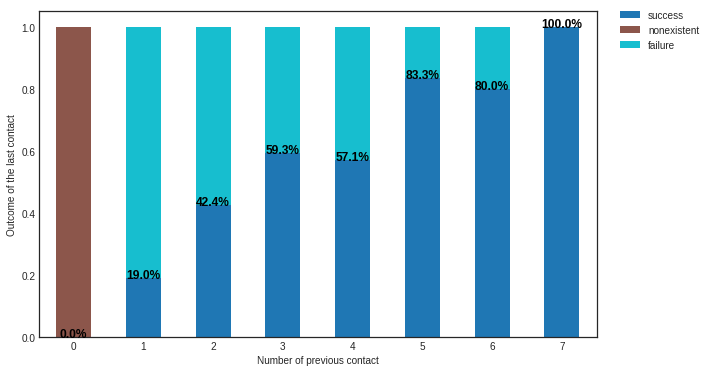

In [147]:
previousxpoutcome = pd.crosstab(index=banking['previous'],
            columns=banking['poutcome'])

previousxpoutcome_prop = pd.crosstab(index=banking['previous'],
            columns=banking.poutcome,
            normalize="index")

def swap_columns(previousxpoutcome_prop, col1, col2):
    col_list = list(previousxpoutcome_prop.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    previousxpoutcome_prop = previousxpoutcome_prop[col_list]
    return previousxpoutcome_prop

previousxpoutcome_prop = swap_columns(previousxpoutcome_prop, 'failure', 'success')

previousxpoutcome_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="lower right", ncol=1)
plt.xlabel("Number of previous contact", rotation = 0)
plt.ylabel("Outcome of the last contact")
plt.xticks(rotation = 0)

plt.legend(loc='best', bbox_to_anchor=(0.7,0.53,0.5,0.5))

for n, x in enumerate([*previousxpoutcome.index.values]):
    for (column, proportion, y_loc) in zip(previousxpoutcome_prop,
                                  previousxpoutcome_prop.loc[x], 
                                   previousxpoutcome_prop.loc[x].cumsum()):
        if column == 'success':
          plt.text(x=n,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold",
                 ha = 'center')


plt.show()

*The dark-blue shaded region ('success') showcases the percentage of success for each count of client contacted.*

We can clearly see that the successful campaign rate rises as the number of contacts made per client increases. For example, when clients are contacted five times, the successful campaign rate reaches 83.3%. 

<i>**As the number of contacts made per client increases, the campaign success rate rises. This indicates that efforts made to contact clients does make an influence and improve the results**</i>




## Topic 4: Details on the latest Contact made with the Client

### **[Question 4.1] How does day of week play a role in impacting the client's decision to subscribe to bank services?**

In [148]:
banking_yes = banking[banking['Subscribed (Yes/No)'] == 'yes']

a1 = banking_yes.day_of_week.value_counts()
b1 = banking.day_of_week.value_counts()
c1 = a1/b1
c1.sort_values(ascending=False)
c1.to_frame()

,day_of_week
fri,0.108087
mon,0.099483
thu,0.121188
tue,0.117800
wed,0.116671


**Day of week** has no individual significant impact on whether a person will subscribe to bank services. This shows that contacting the client any day of the week won't affect his decision!

### **[Question 4.2] What's the optimal call duration that leads to the highest subscription rate among customers?**

In [149]:
duration_subscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['duration'].value_counts().sort_index(ascending=False)
duration_not_subscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['duration'].value_counts().sort_index(ascending=False)

duration_subscribed_prop = round((duration_subscribed/(duration_not_subscribed+duration_subscribed))*100,2).sort_values(ascending = False)


duration_subscribed_prop_df = duration_subscribed_prop.to_frame(name = 'Success Percentage')
duration_subscribed_prop_df.reset_index(inplace = True)
duration_subscribed_prop_df = duration_subscribed_prop_df.rename(columns = {'index':'duration (mins)'})
duration_subscribed_prop_df.head(14)
highlight= lambda x: ['background: red' if x.name in [0, 13] else '' for i in x]
duration_subscribed_prop_df.style.apply(highlight,axis=1)

,duration (mins),Success Percentage
0,20 - 30,63.040000
1,30+,59.410000
2,10 - 20,46.200000
3,0 - 10,7.820000


**As call duration increases, the success rate for subscriptions increases(shown above).**

Optimal contact duration appears to fall within 20-30 minutes. However, this is only up to the 50-minute call duration mark. Any call duration beyond 30-minutes shows diminishing success rate. This is surprising because a longer call time would be thought to ensue trust with the client. However, too long a call maybe becomes burdensome and leads to apprehension from the client. *As such, bank should take note of this when contacting the clients.*


###**[Question 4.3] What's the optimal number of times of contacting a customer can the bank expect the highest subscription rate?**

In [150]:
campaign_subscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['campaign'].value_counts().sort_index(ascending=False)
campaign_not_subscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['campaign'].value_counts().sort_index(ascending=False)

campaign_subscribed_prop = round((campaign_subscribed/(campaign_not_subscribed+campaign_subscribed))*100,2).sort_values(ascending = False)
campaign_subscribed_prop = campaign_subscribed_prop.to_frame(name = 'Success Percentage (%)')
campaign_subscribed_prop.reset_index(inplace = True)

campaign_subscribed_prop = campaign_subscribed_prop.rename(columns = {'index':'Number of Contacts'})
campaign_subscribed_prop['Success Percentage (%)'] = round(campaign_subscribed_prop['Success Percentage (%)'], 2)
highlight= lambda x: ['background: red' if x.name in [5,6] else '' for i in x]
campaign_subscribed_prop.style.apply(highlight,axis=1)

,Number of Contacts,Success Percentage (%)
0,0 - 5,11.970000
1,5 - 10,6.860000
2,10 - 15,4.650000
3,15 - 20,2.740000
4,20 - 25,0.980000
5,25 - 30,nan
6,30+,nan


Surprisingly, contacting a particular customer only between 0-5 times had the highest subscription rate.

*Our hypothesis was that more someone was contacted, the more brand affinity they would have with the banking institution, and therefore subscribe more.* However, this was not the case. Success rate decreased as number of times of the contact made per client decreased. In fact, anyone contacted more frequently than bi-weekly (more than 25 times in 10 months), did not subscribe at all. 

<i>**As such, banking institutions should cap their marketing contact frequency to clients to bi-weekly max!**</i>


## Topic 5: Identifying optimal call duration based on contact type

In [151]:
banking_subscribed = banking[banking['Subscribed (Yes/No)'] == 'yes']['duration'].value_counts().sort_index(ascending=False)
banking_not_subscribed = banking[banking['Subscribed (Yes/No)'] == 'no']['duration'].value_counts().sort_index(ascending=False)

banking_subscribed_prop = round((banking_subscribed/(banking_not_subscribed+banking_subscribed))*100,2).sort_values(ascending = False)
banking_subscribed_prop = banking_subscribed_prop.to_frame(name = 'Success Percentage (%)')
banking_subscribed_prop.reset_index(inplace = True)

banking_subscribed_prop = banking_subscribed_prop.rename(columns = {'index':'Contact duration(mins)'})
banking_subscribed_prop['Success Percentage (%)'] = round(banking_subscribed_prop['Success Percentage (%)'], 2)

banking_subscribed_prop


,Contact duration(mins),Success Percentage (%)
0,20 - 30,63.04
1,30+,59.41
2,10 - 20,46.20
3,0 - 10,7.82


###**[Question 5.1] What is the optimal call duration for contacting a customer based on contact type which leads to the highest subscription rate?**

In [152]:
banking_yes = banking[banking['Subscribed (Yes/No)']=='yes']
banking_contact_duration = banking_yes.groupby(['contact','duration']).agg({'Subscribed (Yes/No)': 'count'})
optimal_call_duration = banking_contact_duration.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
optimal_call_duration

Subscribed (Yes/No)
contact   duration                     
cellular  0 - 10              67.505840
          10 - 20             26.784324
          20 - 30              4.827407
          30+                  0.882429
telephone 0 - 10              44.345616
          10 - 20             42.820839
          20 - 30              9.529860
          30+                  3.303685

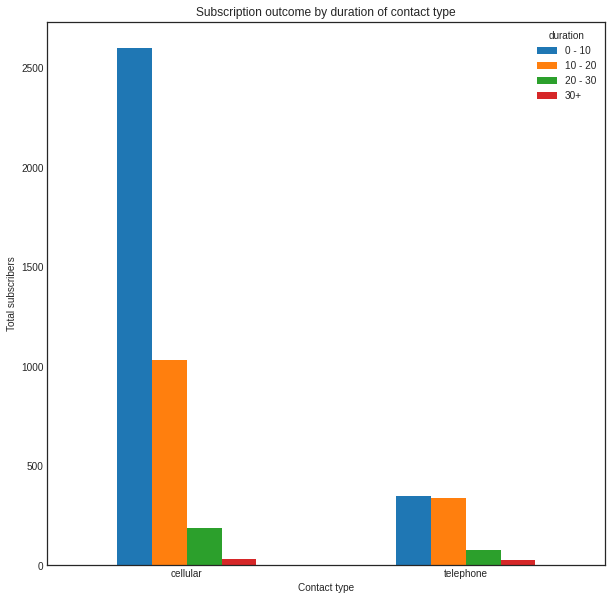

In [153]:
pd.crosstab(banking_yes.contact,banking_yes['duration']).plot(kind='bar', figsize = (10,10))
plt.title('Subscription outcome by duration of contact type')
plt.xlabel('Contact type')
plt.ylabel('Total subscribers')
plt.xticks(rotation = 0);

**93%** of all subscribed customers who were contacted through cell were called for a duration between 0-20 minutes. **87%** of all subscribed customers who were contacted through telephone were called for a duration between 0-20 minutes.

This tells us that for both modes of contact, the duration range of **0-20** minutes would be optimal.

#6. Conclusion

Marketing Analytics is growing stronger everyday. With its augmenting prevalence in industries, companies are adopting new techniques to enhance their overall performance. Calculated decisions are being backed by data to optimize marketing outcomes. 

Through this project, we took a deep dive into analyzing a large Portuguese bank’s data to understand their decision making process while making various marketing strategies available to the public. We analyzed the data across numerous parameters and came up with the following conclusions:

**Call Duration:** This factor was the most important feature in client conversion. We saw that call duration of 20-30 minutes was the most optimal, indicating too long or too short calls are trivial and ineffective.
Job Status: Students & retired individuals have the highest subscription rate to the bank’s facility. This indicates that banks may have attractive offers dedicated for students and retired professionals, rather than working individuals. This is completely in line with real-time data as banks have special deals for students such as student loans and retirement plans for older individuals. Through our analysis, we recommend the bank to create lucrative offers and deals across other population segments that may enhance their client conversion.

**Education Status:** The campaign success percentage tends to increase as the educational level goes up.

**Loan Status:** Across all education levels, customers who don’t have personal loans are more likely to subscribe to term deposits. Therefore, our recommendation is to target those without personal loans.

**Contact Type:** When comparing cellular vs. traditional telephone, those contacted via cellular showed a much higher subscription rate. Therefore, cellular should be prioritized to save costs and optimize campaign success. 

**Outcome of Previous Campaigns:** Results show having a failed campaign produces better results than having no campaign. This may be due to increased brand awareness and affinity. For future campaigns, these results indicate that it is valuable to target customers who previously said no during past marketing campaigns.

**Number of Times Contacted:** Surprisingly, contacting a particular customer only between 0-5 times had the highest subscription rate. Our hypothesis was that the more someone was contacted, the more brand affinity they would have with the banking institution, and therefore subscribe more. However, this doesn’t seem to be the case. Anyone contacted more frequently than bi-weekly (more than 25 times in 10 months), did not subscribe at all. As such, we suggest banking institutions to cap their marketing contact frequency to clients to bi-weekly max.

In conclusion, marketing campaigns are highly dependent on past data and experience. We analyzed the banking industry closely and understood how marketing decisions were made and implemented to ensure customer satisfaction.




#7. Future Scope

Since Marketing Analytics is highly relevant in today’s world, the future scope of this project is very high. We can dive deeper into the banking industry to clearly understand and eventually predict the success rate of certain marketing campaigns depending on past successes/ failures across different attributes of that bank’s projects. 

Our data was composed of records from a large Portuguese banking institution. It would be valuable to see if our conclusions and insights are consistent among different banking institutions in Portugal, and different countries. Important next steps are seeing how our results can be generalized to the banking industry as a whole. Also, monitoring if the best marketing campaign strategies have changed since the beginning and end on the COVID-19 pandemic would prove valuable. 

We can analyze the public's response and acceptance to a new launch. This detailed analysis can be added to various machine learning models and train the model to predict client response. We aim to keep working on this project and expand its current scope into a more diverse and a concrete prediction model.